In [4]:
import os
os.chdir('/Users/mac/Desktop/Dinger')

### 프로젝트 root로 설정

In [5]:
print("현재 디렉토리 " , os.getcwd())

현재 디렉토리  /Users/mac/Desktop/Dinger


In [6]:
import pandas as pd 

data = pd.read_csv("/Users/mac/Desktop/Dinger/ExampleStocks/KS11.csv")[["Close", "Volume"]]
data = data.dropna()

In [7]:
from Dinger import resnet

In [8]:
gd = resnet.GenerateDataset(data=data, size=64)
image_data, label_data = gd.generate_image()

===== Done Scaling =====
Max Close : 3305.209961, Min Close: 1457.640015
Max Volume : 3455500.0, Min Volume: 131390.0
===== complete generating wbt =====
Num of Up trend:1150
Num of Down trend:845
Num of Side trend:1073
===== complete generating image =====
Image shape:(3068, 1, 64, 64)
Label shape:(3068, 3)


In [9]:
image_data.shape

(3068, 1, 64, 64)

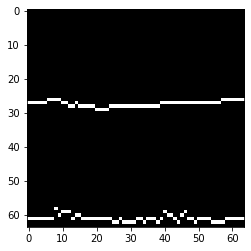

In [10]:
import matplotlib.pyplot as plt

plt.imshow(image_data[4,0], cmap="gray")
plt.show()

In [39]:
resnet = resnet.ResNet()
training_model = resnet.TrainingModel(model=resnet, x_all=image_data, y_all=label_data)

In [ ]:
epochs = 20
training_model.train_test_split()
training_model.train(epochs=epochs)

In [ ]:
path = f"/Users/mac/Desktop/Dinger/Models/ResNet-{epochs}epochs.pth"

training_model.save(path)

In [ ]:
training_model.test()